In this tutorial, we will use ProSRS algorithm to solve a general user-defined optimization problem. For the purpose of demonstration, we will use a simple 2D function corrupted with Gaussian random noise:
<img width="354" alt="demo_function" src="https://user-images.githubusercontent.com/8780593/53434522-71f49500-39bc-11e9-81e1-a0f2121dbb37.png">
where $\epsilon$ is normally distributed with mean 0 and standard deviation 0.1. It is easy to see that the global mininum of the underlying true function $\mathbb{E}[f(x,y)]$ is 0, obtained at the location (0, 0). However, now let's pretend that we know neither the underlying expectation function nor the minimum, as it is true in most real optimization problems. We will try to solve the problem by only accessing the evaluations of the noisy function $f$.

In [1]:
import prosrs
import numpy as np

In [2]:
# Define the function that will be optimized over
def f(x):
    """
    Args:
        
        x (1d array): Function input.
    
    Returns:
    
        y (float): Function output.
    """
    sd = 0.1
    y = x[0]**2+x[1]**2+np.random.normal(0, sd)
    return y

In [3]:
# Define optimization problem
name = 'Demo' # problem name
domain = [(-5., 5.), (-5., 5.)] # function domain
x_var = ['x', 'y'] # independent variable names
y_var = 'z' # response variable name
prob = prosrs.Problem(f, domain, name=name, x_var=x_var, y_var=y_var) # create problem object
print(prob) # show problem info

Optimization problem:
- Name: Demo
- Dimension: 2
- Domain: {'x': (-5.0, 5.0), 'y': (-5.0, 5.0)}
- Response variable: 'z'
- Global minimum: unknown
- Global minimum locations: unknown


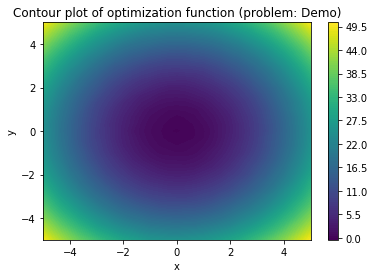

In [4]:
prob.visualize(n_samples=1000, plot='contour') # contour plot of (noisy) function

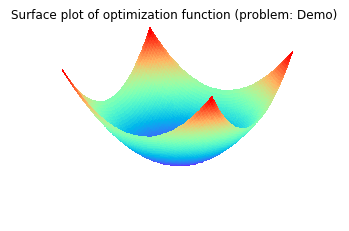

In [5]:
prob.visualize(n_samples=5000, plot='surface') # surface plot of (noisy) function

In [6]:
# Set up optimization
n_worker = 12 # number of workers
n_cycle = 1 # number of optimization cycles
optimizer = prosrs.Optimizer(prob, n_worker, n_cycle=n_cycle) # create optimizer object

In [7]:
# Check optimization configuration to make sure everything looks fine
optimizer.show(select=['config'])

Optimization configuration:
- Number of workers: 12
- Termination criterion: stop after completing 1 optimization cycles
- Resuming from the last run?  No
- Output directory: 'out'


In [8]:
# Run optimization
optimizer.run()


Start running ProSRS algorithm ...

Iteration 1:
Proposing new points (DOE) .......... Done (time took: 6.34e-06 sec).
Evaluating proposed points .......... Done (time took: 9.58e-02 sec).
Updating optimizer state .......... Done (time took: 8.50e-04 sec).

Iteration 2:
Building RBF regression model .......... Done (time took: 2.51e-02 sec).
Proposing new points .......... Done (time took: 3.95e-03 sec).
Evaluating proposed points .......... Done (time took: 1.33e-02 sec).
Updating optimizer state .......... Done (time took: 4.61e-04 sec).

Iteration 3:
Building RBF regression model .......... Done (time took: 2.57e-02 sec).
Proposing new points .......... Done (time took: 9.12e-03 sec).
Evaluating proposed points .......... Done (time took: 1.56e-02 sec).
Updating optimizer state .......... Done (time took: 6.30e-04 sec).

Iteration 4:
Building RBF regression model .......... Done (time took: 2.71e-02 sec).
Proposing new points .......... Done (time took: 5.33e-03 sec).
Evaluating pr


Finished running ProSRS algorithm.


In [9]:
# Show optimization results
optimizer.show(select=['result']) 

Optimization result:
- Best point:
  x = 0.0675409, y = 0.0368185
- Best (noisy) value:
  z = -0.267438


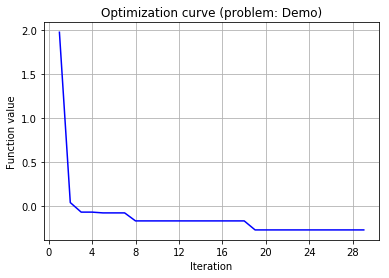

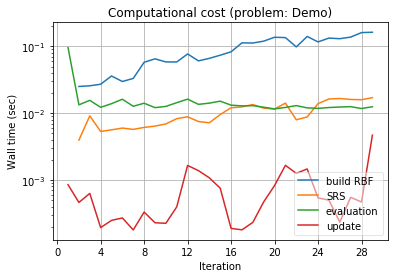

In [10]:
# Visualize optimization results
optimizer.visualize(select=['optim_curve', 'time']) # optimization curve and computational costs of different components

In [11]:
# Now select the true best point from all the points that have been evaluated so far
n_top = 100 # select from top 100 points
n_repeat = 100 # number of Monte Carlo repeats
optimizer.posterior_eval(n_top=n_top, n_repeat=n_repeat) # run posterior Monte Carlo evaluations

Running posterior evaluations (n_point = 100, n_repeat = 100) .......... Done (time took: 6.37e-01 sec).


In [12]:
# Show posterior evaluation results
optimizer.show(select=['post_result'], n_display=10) # display the true best point as well as top 10 points

Posterior evaluation results:
- Condition: run ProSRS algorithm for 29 iterations, then run posterior evaluations with 100 Monte Carlo repeats
- True best point:
  x = -0.00398517, y = 0.0188333
- True best value:
  z = -0.0168467
- Top 10 points sorted by mean response estimates in Column 3:
               x             y     mean of z    std of z
     -0.00398517     0.0188333    -0.0168467     0.10382
        0.052794   -0.00990112     -0.014664   0.0968309
     0.000525153     0.0398275    -0.0105333    0.100591
       0.0291564    0.00948164   -0.00996051    0.108875
      -0.0676148     -0.033974   -0.00731349    0.113011
        0.023577     0.0114009   -0.00713064   0.0882457
       0.0159035     0.0130352   -0.00673901   0.0997713
      -0.0307424     0.0257534   -0.00671296   0.0930354
      -0.0133138   -0.00396448   -0.00552519   0.0986572
      -0.0284368   -0.00717304   -0.00497546    0.099594
